# Yahoo! Finance

## Installation

In [ ]:
%pip3 install --upgrade numpy
%pip3 install --upgrade pandas
%pip3 install --upgrade yfinance

## Documentation

- https://github.com/ranaroussi/yfinance
- https://analyzingalpha.com/yfinance-python
- https://www.qmr.ai/yfinance-library-the-definitive-guide/

## Load yfinance and other libs

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append('..')
from Personal.mpt.tickers import *

## Select a ticker

In [4]:
ticker = yf.Ticker(IEAC_ETF.ticker)
data = ticker.history(period='5y', interval='1wk')
# data.resample('W')
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2018-02-19 00:00:00+00:00,129.729996,129.899994,129.440002,129.899994,151263,0.0,0.0,0.0
2018-02-26 00:00:00+00:00,129.990005,130.039993,129.699997,129.699997,395939,0.0,0.0,0.0
2018-03-05 00:00:00+00:00,130.009995,130.009995,129.330002,129.839996,351072,0.0,0.0,0.0
2018-03-12 00:00:00+00:00,129.880005,130.110001,129.610001,129.750000,117738,0.0,0.0,0.0
2018-03-19 00:00:00+00:00,129.600006,129.679993,128.949997,129.369995,681767,0.0,0.0,0.0


In [ ]:
## Save data as csv
data.to_csv('data/' + IEAC_ETF.ticker + '.csv')

<AxesSubplot: xlabel='Date'>

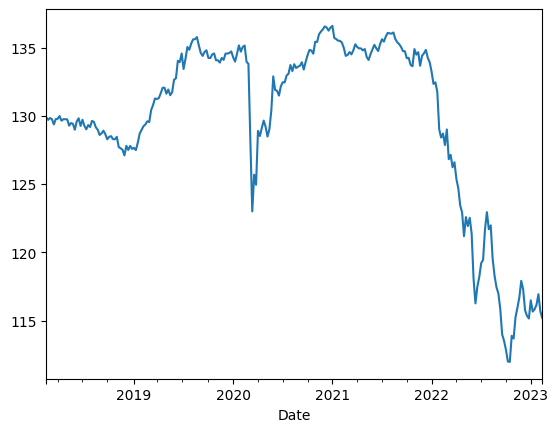

In [ ]:
data.Close.plot()

## Select several tickers

In [9]:
tickers = yf.Tickers([SPY_ETF.ticker, AGG_ETF.ticker, 'BIL']) # use BIL or BIL for the risk-free rate 
data = tickers.history(period='5y', interval='1mo') # group_by = 'ticker'
data.head()

[*********************100%***********************]  3 of 3 completed


Capital Gains                Close             \
                                    AGG  BIL  SPY        AGG        BIL   
Date                                                                      
2018-03-01 00:00:00-05:00           0.0  0.0  0.0  95.187721  86.542847   
2018-04-01 00:00:00-04:00           0.0  0.0  0.0  94.285843  86.608154   
2018-05-01 00:00:00-04:00           0.0  0.0  0.0  94.910042  86.736038   
2018-06-01 00:00:00-04:00           0.0  0.0  0.0  95.000351  86.847008   
2018-07-01 00:00:00-04:00           0.0  0.0  0.0  94.990173  86.966667   

                                      Dividends                     High  ...  \
                                  SPY       AGG    BIL    SPY        AGG  ...   
Date                                                                      ...   
2018-03-01 00:00:00-05:00  241.606720     0.235  0.079  1.097  95.196598  ...   
2018-04-01 00:00:00-04:00  243.828064     0.243  0.105  0.000  95.228699  ...   
2018-05-01 00:00:00-04:00  249.755295     0.240  0.107  0.000  95.391457  ...   
2018-06-01 00:00:00-04:00  250.068756     0.249  0.126  1.246  95.089703  ...   
2018-07-01 00:00:00-04:00  260.497406     0.229  0.127  0.000  95.429035  ...   

                                  Low       Open                         \
                                  SPY        AGG        BIL         SPY   
Date                                                                      
2018-03-01 00:00:00-05:00  236.722245  94.557575  86.419952  249.190508   
2018-04-01 00:00:00-04:00  234.757439  95.086384  86.513543  242.021295   
2018-05-01 00:00:00-04:00  238.794956  94.259244  86.603429  243.238089   
2018-06-01 00:00:00-04:00  247.496897  94.669742  86.723722  251.110406   
2018-07-01 00:00:00-04:00  249.302678  95.025999  86.843211  249.552702   

                          Stock Splits              Volume            \
                                   AGG  BIL  SPY       AGG       BIL   
Date                                                                   
2018-03-01 00:00:00-05:00          0.0  0.0  0.0  79620800  16592100   
2018-04-01 00:00:00-04:00          0.0  0.0  0.0  96179600  29113200   
2018-05-01 00:00:00-04:00          0.0  0.0  0.0  62416700  25807000   
2018-06-01 00:00:00-04:00          0.0  0.0  0.0  71540800  15057000   
2018-07-01 00:00:00-04:00          0.0  0.0  0.0  66007600  14835900   

                                       
                                  SPY  
Date                                   
2018-03-01 00:00:00-05:00  2323561800  
2018-04-01 00:00:00-04:00  1998466500  
2018-05-01 00:00:00-04:00  1606397200  
2018-06-01 00:00:00-04:00  1599001000  
2018-07-01 00:00:00-04:00  1266892500  

[5 rows x 24 columns]

In [10]:
data["Close"][["AGG", "SPY", "BIL"]].head() # double brackets keeps a dataframe
# data.loc[:, [("Close", SPY_ETF.ticker), ("Close", AGG_ETF.ticker)]]

,AGG,SPY,BIL
Date,,,
2018-03-01 00:00:00-05:00,95.187721,241.606720,86.542847
2018-04-01 00:00:00-04:00,94.285843,243.828064,86.608154
2018-05-01 00:00:00-04:00,94.910042,249.755295,86.736038
2018-06-01 00:00:00-04:00,95.000351,250.068756,86.847008
2018-07-01 00:00:00-04:00,94.990173,260.497406,86.966667


In [ ]:
# Add dividend to close price
data['AGG']=data['Close']['AGG'] + data['Dividends']['AGG']
data['SPY']=data['Close']['SPY'] + data['Dividends']['SPY']
data['BIL']=data['Close']['BIL'] + data['Dividends']['BIL']
data.head()

Capital Gains                Close             \
                                    AGG  BIL  SPY        AGG        BIL   
Date                                                                      
2018-03-01 00:00:00-05:00           0.0  0.0  0.0  95.187729  86.542854   
2018-04-01 00:00:00-04:00           0.0  0.0  0.0  94.285835  86.608177   
2018-05-01 00:00:00-04:00           0.0  0.0  0.0  94.910049  86.736000   
2018-06-01 00:00:00-04:00           0.0  0.0  0.0  95.000351  86.847023   
2018-07-01 00:00:00-04:00           0.0  0.0  0.0  94.990173  86.966675   

                                      Dividends                     High  ...  \
                                  SPY       AGG    BIL    SPY        AGG  ...   
Date                                                                      ...   
2018-03-01 00:00:00-05:00  241.606750     0.235  0.079  1.097  95.196606  ...   
2018-04-01 00:00:00-04:00  243.828094     0.243  0.105  0.000  95.228691  ...   
2018-05-01 00:00:00-04:00  249.755325     0.240  0.107  0.000  95.391465  ...   
2018-06-01 00:00:00-04:00  250.068695     0.249  0.126  1.246  95.089703  ...   
2018-07-01 00:00:00-04:00  260.497375     0.229  0.127  0.000  95.429035  ...   

                                 Open Stock Splits              Volume  \
                                  SPY          AGG  BIL  SPY       AGG   
Date                                                                     
2018-03-01 00:00:00-05:00  249.190540          0.0  0.0  0.0  79620800   
2018-04-01 00:00:00-04:00  242.021326          0.0  0.0  0.0  96179600   
2018-05-01 00:00:00-04:00  243.238119          0.0  0.0  0.0  62416700   
2018-06-01 00:00:00-04:00  251.110345          0.0  0.0  0.0  71540800   
2018-07-01 00:00:00-04:00  249.552673          0.0  0.0  0.0  66007600   

                                                       AGG         SPY  \
                                BIL         SPY                          
Date                                                                     
2018-03-01 00:00:00-05:00  16592100  2323561800  95.422729  242.703750   
2018-04-01 00:00:00-04:00  29113200  1998466500  94.528835  243.828094   
2018-05-01 00:00:00-04:00  25807000  1606397200  95.150049  249.755325   
2018-06-01 00:00:00-04:00  15057000  1599001000  95.249351  251.314695   
2018-07-01 00:00:00-04:00  14835900  1266892500  95.219173  260.497375   

                                 BIL  
                                      
Date                                  
2018-03-01 00:00:00-05:00  86.621854  
2018-04-01 00:00:00-04:00  86.713177  
2018-05-01 00:00:00-04:00  86.843000  
2018-06-01 00:00:00-04:00  86.973023  
2018-07-01 00:00:00-04:00  87.093675  

[5 rows x 27 columns]

In [ ]:
# Discard useless columns
data.drop(columns=['Capital Gains', 'Close', 'Dividends', 'High', 'Low', 'Open', 'Stock Splits', 'Volume'], inplace=True)

In [ ]:
# Drop first row with NaN 
df = data.pct_change().iloc[1:]

In [ ]:
df.head()

,AGG,SPY,BIL
,,,
Date,,,
2018-04-01 00:00:00-04:00,-0.009368,0.004633,0.001054
2018-05-01 00:00:00-04:00,0.006572,0.024309,0.001497
2018-06-01 00:00:00-04:00,0.001044,0.006244,0.001497
2018-07-01 00:00:00-04:00,-0.000317,0.036539,0.001387
2018-08-01 00:00:00-04:00,0.005684,0.031920,0.001588


In [ ]:
df['AGG'] = df['AGG'] - df['BIL']
df['SPY'] = df['SPY'] - df['BIL']
df.drop(columns=['BIL'], inplace=True)
df.head()

,AGG,SPY
,,
Date,,
2018-04-01 00:00:00-04:00,-0.010422,0.003578
2018-05-01 00:00:00-04:00,0.005075,0.022812
2018-06-01 00:00:00-04:00,-0.000454,0.004746
2018-07-01 00:00:00-04:00,-0.001704,0.035151
2018-08-01 00:00:00-04:00,0.004096,0.030332


In [ ]:
df.index = df.index.to_period('M')
df.head()

C:\Users\jlche\AppData\Local\Temp\ipykernel_16476\4209298650.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df.index = df.index.to_period('M')


,AGG,SPY
,,
Date,,
2018-04,-0.010422,0.003578
2018-05,0.005075,0.022812
2018-06,-0.000454,0.004746
2018-07,-0.001704,0.035151
2018-08,0.004096,0.030332


In [ ]:
from Edhec.C2.edhec_risk_kit_207 import summary_stats
summary_stats(df)

,,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
AGG,,-0.006216,0.054014,-0.333457,3.515501,0.027101,0.037897,-0.652601,-0.176511
SPY,,0.097510,0.187189,-0.424704,2.827685,0.085367,0.103619,0.350791,-0.243459


Annualized Return	Annualized Vol	Skewness	Kurtosis	Cornish-Fisher VaR (5%)	Historic CVaR (5%)	Sharpe Ratio	Max Drawdown
AGG		0.001161	0.052368	-0.462267	3.759192	0.026128	0.037897	-0.536023	-0.176506
SPY		0.092814	0.185677	-0.420719	2.851530	0.084917	0.103617	0.329032	-0.243455